In [1]:
!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 932.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=782d606071d2c94b956c8e9c4e72f8cba336de26628a2f2fdb7fc2fe1c5ecaf8
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [2]:
# Quantum Teleportation (Coherent version) – Qiskit 2.x compatible
# Works on modern qiskit-aer simulators

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

Initial state of qubit 0:


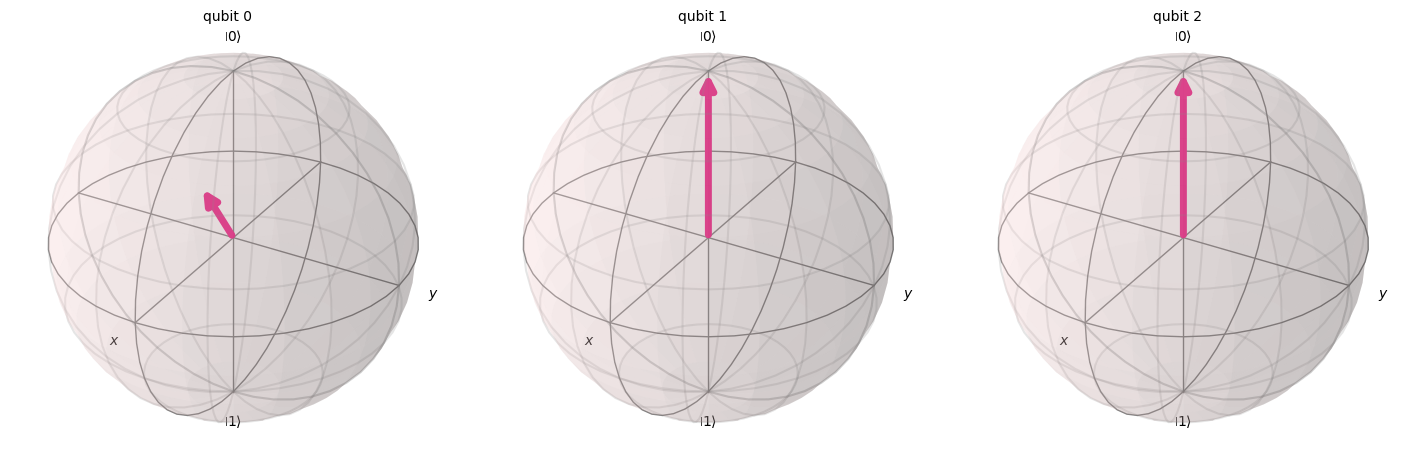

In [3]:
qc = QuantumCircuit(3)

# Prepare arbitrary state |ψ⟩ on qubit 0
theta, phi = 0.8, 0.3
qc.ry(theta, 0)
qc.rz(phi, 0)

# Save initial state for comparison
sv_initial = Statevector.from_instruction(qc)
print("Initial state of qubit 0:")
display(plot_bloch_multivector(sv_initial))

Initial state of qubit 0:


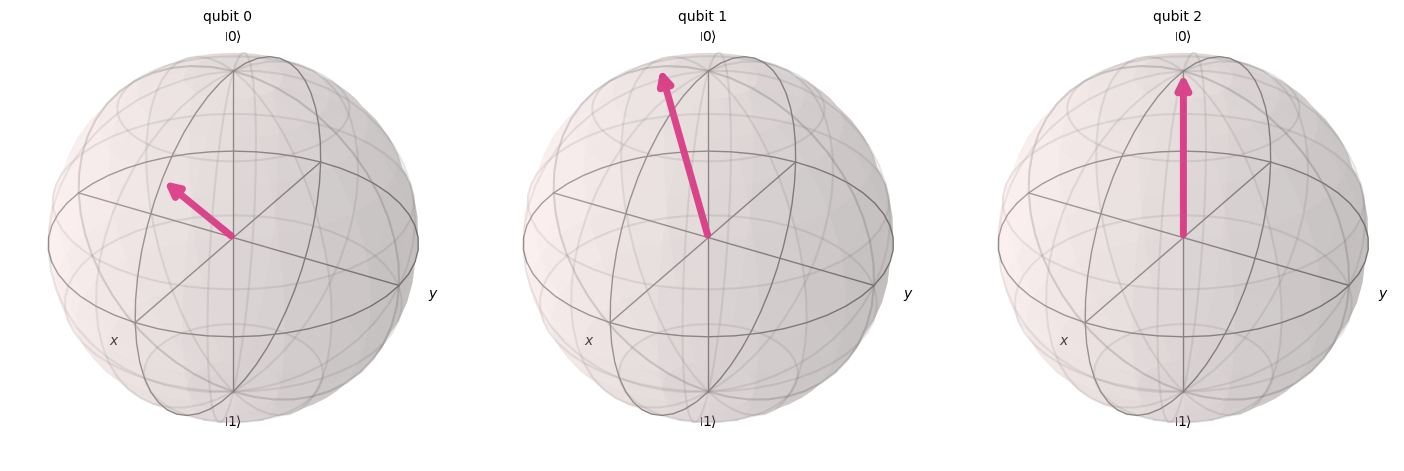

In [4]:
qc = QuantumCircuit(3)
theta, phi = 0.8, 0.3
qc.ry(theta, 0)
qc.rx(phi, 1)

# Save initial state for comparison
sv_initial = Statevector.from_instruction(qc)
print("Initial state of qubit 0:")
display(plot_bloch_multivector(sv_initial))

Initial state of qubit 0:


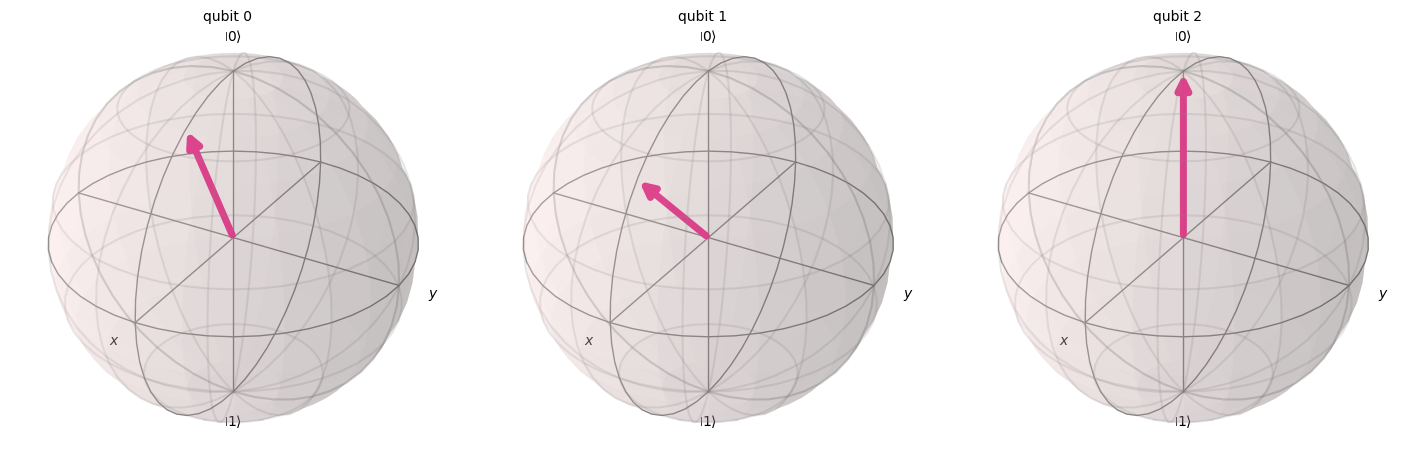

In [5]:
qc = QuantumCircuit(3)

# Prepare arbitrary state |ψ⟩ on qubit 0
theta, phi = 0.8, 0.5
qc.ry(theta, 1)
qc.ry(phi, 0)

# Save initial state for comparison
sv_initial = Statevector.from_instruction(qc)
print("Initial state of qubit 0:")
display(plot_bloch_multivector(sv_initial))

In [6]:
qc.h(1)
qc.cx(1, 2)

# Bell measurement part (but coherent)
qc.cx(0, 1)
qc.h(0)

# Coherent corrections
qc.cx(1, 2)
qc.cz(0, 2)

# Save final statevector explicitly (Qiskit 2.x requires this)
qc.save_statevector()

In [7]:
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled).result()
# Retrieve the saved statevector
sv_final = result.data(0)["statevector"]
sv_final = Statevector(sv_final)

In [8]:
rho_bob = partial_trace(sv_final, [0, 1])
rho_init = partial_trace(sv_initial, [1, 2])

# Extract the dominant pure states (since both should be pure)
eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
eigvals_i, eigvecs_i = np.linalg.eigh(rho_init.data)
bob_state = eigvecs_b[:, np.argmax(eigvals_b)]
init_state = eigvecs_i[:, np.argmax(eigvals_i)]

print("\nInitial: ",eigvals_i, eigvecs_i)
print("\nBob's: ",eigvals_b, eigvecs_b)

# Compute fidelity
fidelity = np.abs(np.vdot(init_state, bob_state)) ** 2
print(f"\nFidelity between initial and teleported states: {fidelity:.6f}")


Initial:  [-1.38777878e-17  1.00000000e+00] [[ 0.24740396+0.j -0.96891242+0.j]
 [-0.96891242+0.j -0.24740396+0.j]]

Bob's:  [0.03050031 0.96949969] [[-0.18084063+0.00000000e+00j -0.98351241+0.00000000e+00j]
 [ 0.98351241-1.20445533e-16j -0.18084063+2.21465898e-17j]]

Fidelity between initial and teleported states: 0.995362



Bob’s final qubit (qubit 2) Bloch vector:


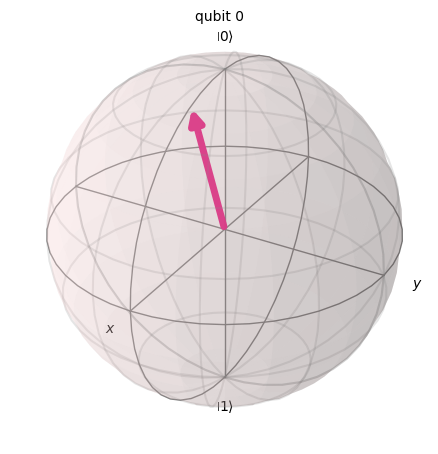

In [9]:
print("\nBob’s final qubit (qubit 2) Bloch vector:")

# Convert rho_bob (DensityMatrix) → pure statevector (dominant eigenvector)
eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
bob_state = eigvecs_b[:, np.argmax(eigvals_b)]  # dominant eigenvector
bob_sv = Statevector(bob_state)

display(plot_bloch_multivector(bob_sv))

**ASSIGNMENT TASKS**

**TASK 1:**

Initial state of qubit 0:


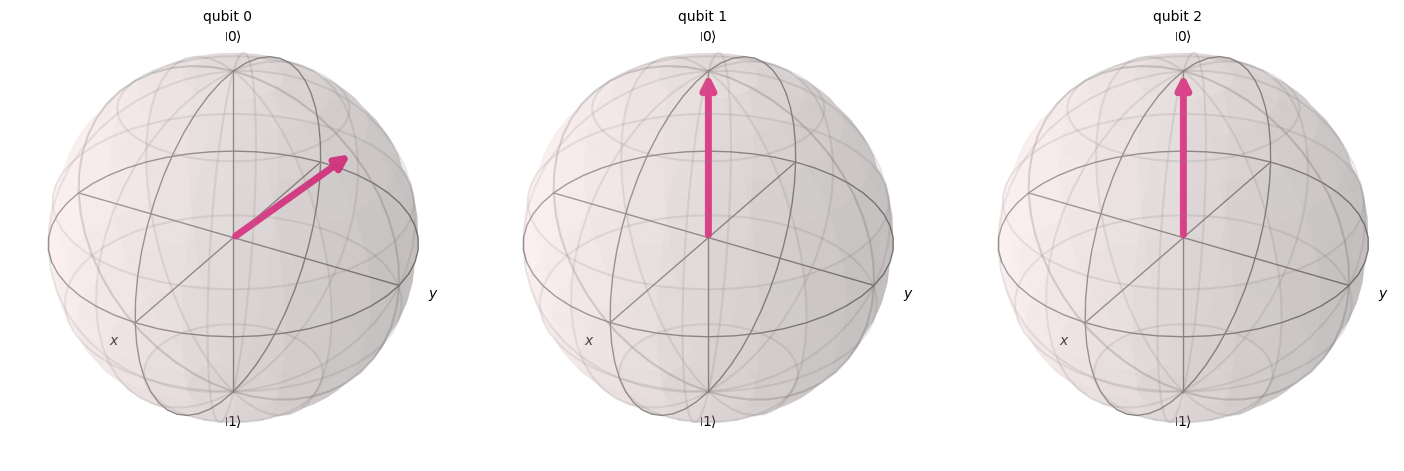

In [10]:
qc = QuantumCircuit(3)

# Prepare arbitrary state |ψ⟩ on qubit 0
theta = np.pi/4   # pi/4
phi   = np.pi/2   # pi/2

qc.ry(theta, 0)
qc.rz(phi, 0)

# Save initial state for comparison
sv_initial = Statevector.from_instruction(qc)
print("Initial state of qubit 0:")
display(plot_bloch_multivector(sv_initial))

**TASK 2:**

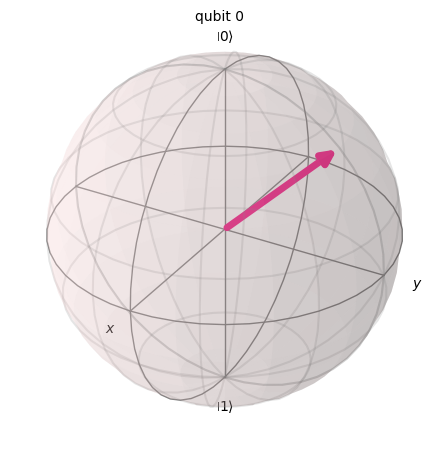

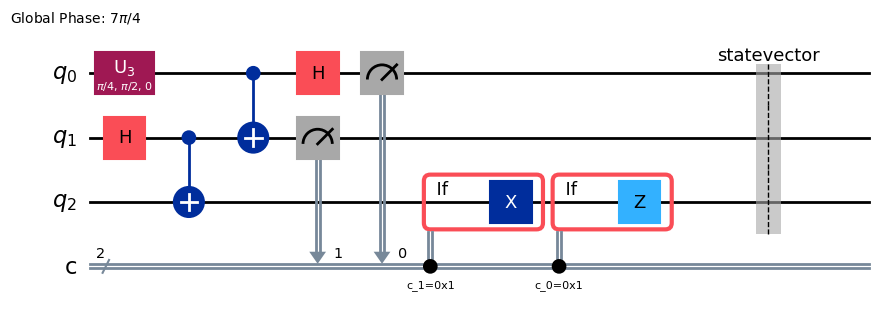

In [13]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer  # <-- FIX: Import Aer from qiskit_aer
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np

# Create a 3-qubit, 2-classical-bit teleportation circuit
qc = QuantumCircuit(3, 2)

# Prepare an arbitrary state |ψ⟩ on qubit 0
theta, phi = np.pi/4, np.pi/2
qc.ry(theta, 0)
qc.rz(phi, 0)

# Create a Bell pair between qubits 1 and 2
qc.h(1)
qc.cx(1, 2)

# Bell measurement
qc.cx(0, 1)
qc.h(0)
qc.measure([0, 1], [0, 1])

# Apply conditional corrections using if_test (Qiskit >= 1.0)
with qc.if_test((qc.clbits[1], 1)):  # if bit 1 == 1 → apply X
    qc.x(2)
with qc.if_test((qc.clbits[0], 1)):  # if bit 0 == 1 → apply Z
    qc.z(2)

# Save statevector
qc.save_statevector()

# Simulate
sim = Aer.get_backend('aer_simulator')
qc = transpile(qc, sim)
result = sim.run(qc).result()

# Get final statevector
sv_final = result.data(0)['statevector']

# Partial trace to get Bob’s qubit
rho_bob = partial_trace(sv_final, [0, 1])

# Visualize Bob’s state
display(plot_bloch_multivector(rho_bob))
plot_histogram(result.get_counts())
qc.draw('mpl')


**TASK 3:**

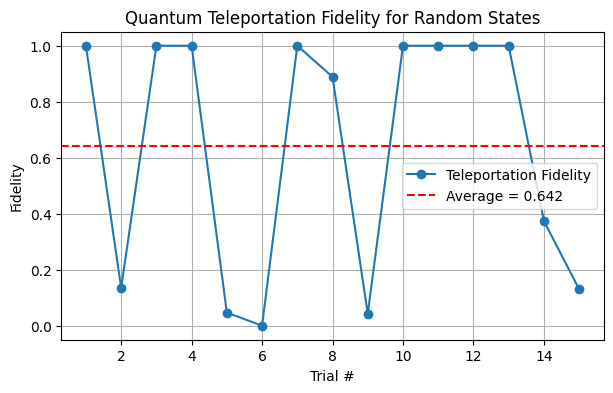

Average Teleportation Fidelity = 0.6419


In [14]:
from qiskit.quantum_info import Statevector, DensityMatrix, state_fidelity, partial_trace

def teleport_fidelity(theta, phi):
    """Run one teleportation experiment and return the fidelity."""
    qc = QuantumCircuit(3, 2)

    qc.ry(theta, 0)
    qc.rz(phi, 0)

    qc.h(1)
    qc.cx(1, 2)

    qc.cx(0, 1)
    qc.h(0)
    qc.measure([0, 1], [0, 1])

    with qc.if_test((qc.clbits[0], 1)):
        qc.x(2)
    with qc.if_test((qc.clbits[1], 1)):
        qc.z(2)
    qc.save_statevector()
    sim = Aer.get_backend('aer_simulator')
    qc = transpile(qc, sim)
    result = sim.run(qc, shots=1, memory=True).result()

    final_state = result.data(0)['statevector']

    # Extract teleported qubit (qubit 2)
    teleported = partial_trace(DensityMatrix(final_state), [0, 1])

    # Ideal original state
    qc_ref = QuantumCircuit(1)
    qc_ref.ry(theta, 0)
    qc_ref.rz(phi, 0)
    ideal = Statevector.from_instruction(qc_ref)


    # Return fidelity
    return state_fidelity(ideal, teleported)

# --- Run for multiple random (θ, φ) pairs ---
num_trials = 15
fidelities = []
for _ in range(num_trials):
    theta = np.random.uniform(0, np.pi)
    phi = np.random.uniform(0, 2*np.pi)
    fidelities.append(teleport_fidelity(theta, phi))

# --- Plot results ---
plt.figure(figsize=(7,4))
plt.plot(range(1, num_trials+1), fidelities, 'o-', label='Teleportation Fidelity')
plt.axhline(np.mean(fidelities), color='r', linestyle='--', label=f'Average = {np.mean(fidelities):.3f}')
plt.xlabel('Trial #')
plt.ylabel('Fidelity')
plt.title('Quantum Teleportation Fidelity for Random States')
plt.legend()
plt.grid(True)
plt.show()

print(f"Average Teleportation Fidelity = {np.mean(fidelities):.4f}")

**TASK 4:**

Initial |ψ⟩ on qubit 0


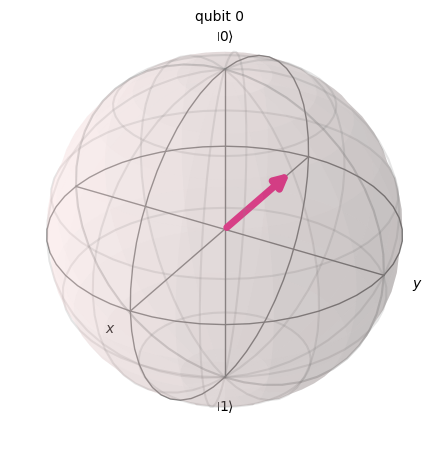

After Bell pair creation


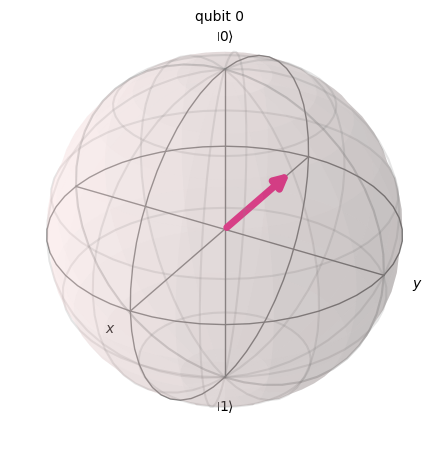

After CX(0,1)


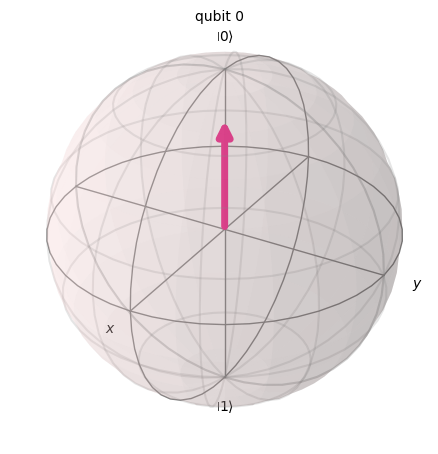

After H on qubit 0


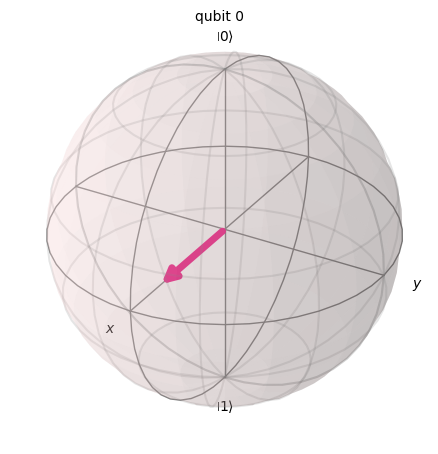

After teleportation complete (Bob’s qubit)


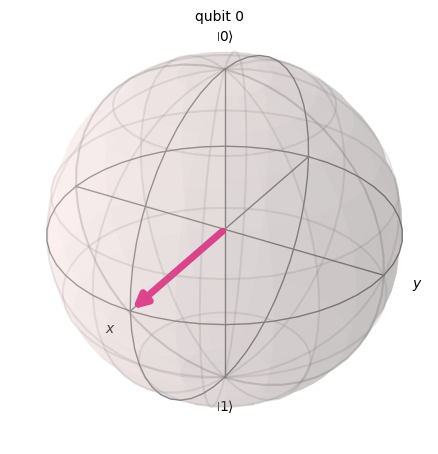

In [15]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_bloch_multivector
import numpy as np

qc = QuantumCircuit(3)
theta, phi = np.pi/4, np.pi/3
qc.ry(theta, 0)
qc.rz(phi, 0)

def show_state(label, qc):
    sv = Statevector.from_instruction(qc)
    rho = partial_trace(sv, [1, 2])  # show qubit 0 by default
    print(label)
    display(plot_bloch_multivector(rho))

show_state("Initial |ψ⟩ on qubit 0", qc)

# Bell pair
qc.h(1)
qc.cx(1, 2)
show_state("After Bell pair creation", qc)

# Entangle and measure steps
qc.cx(0, 1)
show_state("After CX(0,1)", qc)
qc.h(0)
show_state("After H on qubit 0", qc)

# Coherent correction
qc.cx(1, 2)
qc.cz(0, 2)
show_state("After teleportation complete (Bob’s qubit)", qc)

**TASK 5:**

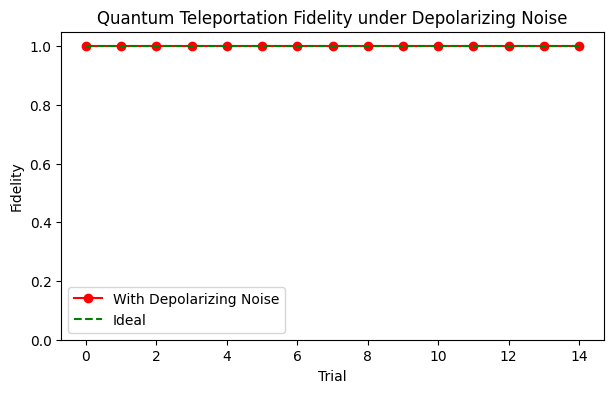

Average noisy fidelity = 1.0000


In [16]:
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.quantum_info import Statevector, partial_trace, state_fidelity

# --- Define a Hermitian-safe noise model (only depolarizing noise) ---
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.01, 1), ["ry", "rz", "h"])
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.02, 2), ["cx", "cz"])

def noisy_fidelity(theta, phi):
    qc = QuantumCircuit(3)

    # Prepare arbitrary state |ψ⟩
    qc.ry(theta, 0)
    qc.rz(phi, 0)
    sv_init = Statevector.from_instruction(qc)

    # Create Bell pair
    qc.h(1)
    qc.cx(1, 2)

    # Bell measurement (coherent form)
    qc.cx(0, 1)
    qc.h(0)

    # Coherent correction (no measurement → Hermitian)
    qc.cx(1, 2)
    qc.cz(0, 2)

    # Save final statevector (Hermitian guaranteed)
    qc.save_statevector()

    sim = AerSimulator(noise_model=noise_model)
    result = sim.run(transpile(qc, sim)).result()
    sv_final = Statevector(result.data(0)["statevector"])

    # Compare Bob’s qubit with original
    rho_bob = partial_trace(sv_final, [0, 1])
    rho_init = partial_trace(sv_init, [1, 2])

    return state_fidelity(rho_init, rho_bob)


# --- Run over multiple random states ---
N = 15
thetas = np.random.uniform(0, np.pi, N)
phis = np.random.uniform(0, 2*np.pi, N)
f_noisy = [noisy_fidelity(t, p) for t, p in zip(thetas, phis)]
f_ideal = [1.0] * N

# --- Plot ---
plt.figure(figsize=(7, 4))
plt.plot(f_noisy, "ro-", label="With Depolarizing Noise")
plt.plot(f_ideal, "g--", label="Ideal")
plt.xlabel("Trial")
plt.ylabel("Fidelity")
plt.title("Quantum Teleportation Fidelity under Depolarizing Noise")
plt.legend()
plt.ylim([0, 1.05])
plt.show()

print(f"Average noisy fidelity = {np.mean(f_noisy):.4f}")